In [1]:
from radd import build, models, fit, vis
from radd.toolbox import theta

In [229]:
mx = build.Model(data=redf_store.redata, kind='sab', dynamic='hyp', depends_on={'v':'Cond', 'tr':'Cond'})
mx.make_optimizer(tol=1.e-20, ntrials=10000, maxfev=5000, multiopt=True)

In [230]:
mx.optimize()

In [233]:
mx.fitinfo['chi']


2.0787754556401535e-05

In [231]:
mx.fits

array([ 0.9486 ,  1.     ,  0.9998 ,  0.9294 ,  0.4764 ,  0.1208 ,
        0.52502,  0.55102,  0.57102,  0.59302,  0.62302,  0.51502,
        0.53902,  0.55702,  0.57502,  0.60302,  0.9054 ,  1.     ,
        1.     ,  0.9516 ,  0.5766 ,  0.1736 ,  0.53302,  0.56102,
        0.58102,  0.60302,  0.63102,  0.52102,  0.54702,  0.56502,
        0.58302,  0.61102])

In [226]:
mx = build.Model(data=redf_store.redata, kind='xradd', dynamic='hyp', fit_on='bootstrap', depends_on={'v':'Cond'})
mx.get_wts('mj')
mx.make_optimizer(tol=1.e-20, ntrials=10000, maxfev=5000, multiopt=True)

In [228]:
mx.optimize()

TypeError: Input must be Index or array-like

In [227]:
mx.avg_wts

array([ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        0.7354 ,  0.93408,  0.99221,  0.99656,  0.852  ,  0.18693,
        0.27972,  0.29962,  0.28591,  0.23456,  1.     ,  1.     ,
        1.     ,  1.     ,  1.     ,  1.     ,  0.7354 ,  0.93408,
        0.99221,  0.99656,  0.852  ,  0.18693,  0.27972,  0.29962,
        0.28591,  0.23456])

In [ ]:
sub.groupby('pGo').std()

In [193]:
len(mx.opt.fits.columns)

17

In [191]:
mx.opt.fits.columns

Index([u'Cond',   u'Go',     200,     250,     300,     350,     400,  u'c10',
        u'c30',  u'c50',  u'c70',  u'c90',  u'e10',  u'e30',  u'e50',  u'e70',
        u'e90'],
      dtype='object')

In [197]:
mx.optimize()

/home/kyle/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1353: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  "use .difference()",FutureWarning)


TypeError: Input must be Index or array-like

In [169]:
dat

Cond
bsl    [0.975, 0.983333...
pnl    [0.966666666667,...
dtype: object

In [166]:
mx.opt.avg_y

array([ 0.95   ,  1.     ,  1.     ,  0.91   ,  0.56   ,  0.07   ,
        0.50404,  0.53198,  0.55844,  0.5851 ,  0.6249 ,  0.49186,
        0.51872,  0.54501,  0.55872,  0.59844])

In [164]:
mx.optimize()

ValueError: operands could not be broadcast together with shapes (32,) (16,) 

In [159]:
mx.optimize()

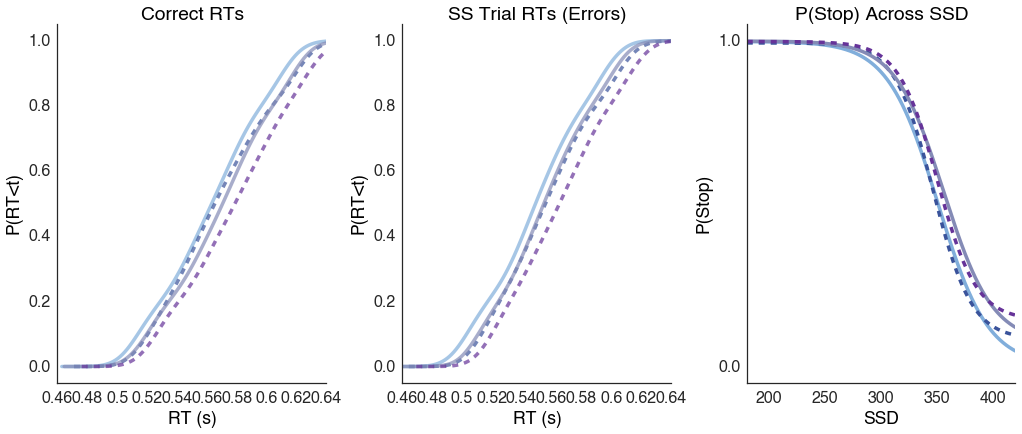

In [153]:
vis.plot_reactive_fits(mx)

In [133]:
mx.avg_wts

array([ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        1.02929,  1.01402,  0.94219,  0.8983 ,  0.89242,  0.26007,
        0.28849,  0.3073 ,  0.27664,  0.27733,  1.     ,  1.     ,
        1.     ,  1.     ,  1.     ,  1.     ,  1.02929,  1.01402,
        0.94219,  0.8983 ,  0.89242,  0.26007,  0.28849,  0.3073 ,
        0.27664,  0.27733])

In [3]:
from scipy.stats.mstats_extras import mjci

In [7]:
mx.optimize()

KeyboardInterrupt: 

In [5]:
def reactive_mj_quanterr(df, avg_ssd=True, prob=array([.1,.3,.5,.7,.9]), as_ratio=True):
      """ calculates weight vectors forreactive RT quantiles by estimating
      first estimating the SEM of RT quantiles for corr. and err. responses.
      (using Maritz-Jarrett estimatation: scipy.stats.mstats_extras.mjci).
      Then representing these variances as ratios.
      e.g.
            QSEM = mjci(rtvectors)
            wts = median(QSEM)/QSEM
      """
      
      
      cor = df.query('response==1&acc==1')
      err = df.query('response==1&acc==0')
      nssd = len(err.ssd.unique())
      nquant = len(prob)
      qe_var = np.hstack(err.groupby('ssd').rt.apply(mjci, prob)).reshape(nssd, nquant)
      qc_var = mjci(cor.rt.values, prob)
      print qe_var
      # correct trial wts
      qcwts = qc_var[2]/qc_var
      # ss trial wts
      if not as_ratio:
            return np.hstack([qc_var,np.median(qe_var, axis=1)]).reshape(2,nquant)
      if avg_ssd:
            qewts = np.median(qe_var)/np.median(qe_var, axis=1)
            print qewts
      else:
            qewts = np.median(qe_var,axis=1)[:,None]/qe_var
      return np.hstack([qcwts, qewts]).reshape(2,nquant)


In [4]:
df=mx.data

In [6]:
reactive_mj_quanterr(df)

[[          nan   1.25896e-02   1.53628e-02   1.26212e-02           nan]
 [  2.52519e-03   4.98121e-03   1.20018e-02   1.37430e-02   4.32619e-02]
 [  4.47829e-03   1.26195e-03   2.02863e-03   3.98119e-03   3.87987e-03]
 [  6.08033e-03   7.19211e-04   2.35126e-03   5.97086e-03   5.27276e-03]
 [  5.40184e-03   5.57714e-03   2.19832e-05   4.02778e-03   1.62539e-03]]
[ 0.34322  0.43933  1.359    1.       1.3091 ]


array([[   0.85862,  294.55464,    1.     ,  210.4771 ,  212.63617],
       [   0.34322,    0.43933,    1.359  ,    1.     ,    1.3091 ]])

In [161]:
mx.observed.iloc[:,3:8].mean(axis=1).mean()

0.7203031405256953

In [162]:
20/(.7*(1-.7))

95.23809523809523

In [65]:
qe_var.reshape(nssd, len(prob))

array([[  1.63478e-02,   6.54360e-03,   5.84673e-03,   4.82223e-03,
          3.92189e-03],
       [  4.06028e-03,   2.11915e-04,   1.35904e-03,   6.10767e-03,
          4.77798e-03],
       [  3.61481e-03,   6.04419e-03,   2.18498e-05,   4.42912e-03,
          1.76845e-03]])

In [139]:
avg_ssd=True; prob=array([.1,.3,.5,.7,.9])
""" calculates weight vectors forreactive RT quantiles by estimating
first estimating the SEM of RT quantiles for corr. and err. responses.
(using Maritz-Jarrett estimatation: scipy.stats.mstats_extras.mjci).
Then representing these variances as ratios.
e.g.
      QSEM = mjci(rtvectors)
      wts = median(QSEM)/QSEM
"""
#df = redf_store.redata
cor = df.query('response==1&acc==1')
err = df.query('response==1&acc==0')
nquant = len(prob)
ncond=2
#qe_var = np.hstack(errs.groupby(['Cond','ssd']).rt.apply(mjci, prob)).reshape(ncond, nssd, nquant)
#qe_ratio = np.median(x, axis=1)[:,None]/x
#xx.mean(axis=1).mean(axis=0)


errcount = err.groupby('ssd').count()['response']
errs = err[err.ssd.isin(errcount[errcount>40].index)]
nssd = len(errs.ssd.unique())

qe_var = np.hstack(errs.groupby('ssd').rt.apply(mjci, prob)).reshape(nssd, nquant)
#qc_var = mjci(np.round(cor.rt.values, 3), prob)
qc_var = mjci(np.round(cor.rt.values, 7), prob)
# correct trial wts
qcwts = np.median(qc_var)/qc_var
# ss trial wts
if avg_ssd:
      qewts = np.median(qe_var)/qe_var.mean(axis=0)
else:
      qewts = np.median(qe_var,axis=1)[:,None]/qe_var
out=np.hstack([qcwts, qewts]).reshape(2,nquant)

In [203]:
mx = build.Model(data=prodf_store.prodata, kind='xpro', dynamic='hyp', fit_on='subjects', depends_on={'v':'pGo'})

0.55


In [112]:
(mx.observed.iloc[:, 3:8].sem()*1.96)[300]/(mx.observed.iloc[:, 3:8].sem()*1.96)

200    9.9317
250    3.8128
300    1.0000
350    0.4299
400    0.6828
dtype: float64

In [141]:
mx.get_wts()#weight_by='mj')

In [138]:
mx.avg_wts

array([ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        0.00381,  1.3072 ,  0.00444,  0.93408,  0.94366,  0.94366,
        0.21938,  0.34718,  0.36159,  0.33825,  1.     ,  1.     ,
        1.     ,  1.     ,  1.     ,  1.     ,  0.00381,  1.3072 ,
        0.00444,  0.93408,  0.94366,  0.94366,  0.21938,  0.34718,
        0.36159,  0.33825])

In [142]:
mx.avg_wts

array([ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        1.02929,  1.01402,  0.94219,  0.8983 ,  0.89242,  0.26007,
        0.28849,  0.3073 ,  0.27664,  0.27733,  1.     ,  1.     ,
        1.     ,  1.     ,  1.     ,  1.     ,  1.02929,  1.01402,
        0.94219,  0.8983 ,  0.89242,  0.26007,  0.28849,  0.3073 ,
        0.27664,  0.27733])

In [143]:

(mx.observed.iloc[:, 2:8].sem()*1.96).median()/mx.observed.iloc[:, 2:8].sem()*1.96

#mx.observed.iloc[:,8:].std()

Go      4.0639
200    36.1752
250    13.8878
300     3.6424
350     1.5660
400     2.4872
dtype: float64

In [42]:
np.set_printoptions(suppress=True)
qcwts

array([ 0.00408,  1.39946,  0.00475,  1.     ,  1.01026])

In [30]:
np.round(cor.rt.values, 3)

array([ 0.599,  0.52 ,  0.545, ...,  0.558,  0.558,  0.558])

In [29]:
np.round(qc_var,5)

array([  5.42000e-03,   2.00000e-05,   4.66000e-03,   2.00000e-05,
         2.00000e-05])

In [24]:
qcwts

array([ 0.00408,  1.39946,  0.00475,  1.     ,  1.01026])

In [19]:
pd.DataFrame(qc_var)

,0
0,5.4221e-03
1,1.5805e-05
2,4.6555e-03
3,2.2119e-05
4,2.1894e-05


In [16]:
out

array([[ 0.00408,  1.39946,  0.00475,  1.     ,  1.01026],
       [ 0.74832,  1.58019,  2.71329,  0.85434,  1.10814]])

In [12]:
df = mx.data

In [14]:
qewts

array([ 0.74832,  1.58019,  2.71329,  0.85434,  1.10814])

In [120]:
iqvar=[]
for idx, idxdf in errs.groupby('idx'):
      ixssd = []
      for ssd, ssdf in idxdf.groupby('ssd'):
            ixssd.append(pd.DataFrame(mjci(ssdf.rt, prob=prob)))
      iqvar.append(pd.concat(ixssd, axis=1))
#ixmj = pd.DataFrame(np.array(iqvar))

In [134]:
qe_var = np.hstack(errs.groupby(['Cond','ssd']).rt.apply(mjci, prob))#.reshape(nssd, nquant)


In [144]:
x = qe_var.reshape(2,3,5)
x

array([[[ 0.01198,  0.00577,  0.00636,  0.00609,  0.00619],
        [ 0.00201,  0.00028,  0.00028,  0.00119,  0.00263],
        [ 0.00031,  0.00118,  0.00178,  0.00611,  0.0038 ]],

       [[ 0.02976,  0.00885,  0.00636,  0.00709,  0.00642],
        [ 0.00543,  0.00592,  0.00626,  0.00106,  0.00553],
        [ 0.00253,  0.00058,  0.00178,  0.00254,  0.00263]]])

In [150]:
xx = np.median(x, axis=1)[:,None]/x

In [152]:
ncond=2
qe_var = np.hstack(errs.groupby(['Cond','ssd']).rt.apply(mjci, prob)).reshape(ncond, nssd, nquant)
xx = np.median(x, axis=1)[:,None]/x
xx.mean(axis=1).mean(axis=0)

array([ 1.84393,  2.88664,  2.18958,  1.81493,  1.17073])

In [126]:
z =pd.concat(iqvar, axis=1).T

In [132]:
len(np.hstack([errs.ssd.unique()]*len(errs.idx.unique())))

183

In [133]:
z.shape

(172, 5)

In [ ]:
ixmj = pd.concat()

In [117]:
pd.DataFrame(qe_var)

,0,1,2,3,4
0,0.0163,0.0065,5.8467e-03,0.0048,0.0039
1,0.0041,0.0002,1.3590e-03,0.0061,0.0048
2,0.0036,0.0060,2.1850e-05,0.0044,0.0018


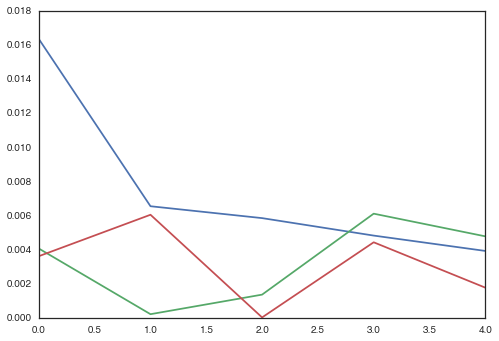

In [115]:
qe_var = np.hstack(errs.groupby('ssd').rt.apply(mjci, prob)).reshape(nssd, nquant)
for qe in qe_var:
      plt.plot(qe)

In [114]:
ixmj.median()/ixmj.mean()

0    0.6464
1    0.7156
2    0.8671
3    0.9227
4    1.0141
dtype: float64

In [108]:
flat_var = mjci(errs.rt, prob=prob)
np.mean(flat_var)/flat_var

array([  0.23542,   2.21767,  73.25398,   3.81424,  39.05023])

In [55]:
obs2.var()

hi10    4.0179e-04
hi30    2.2696e-04
hi50    7.1700e-05
hi70    6.2109e-06
hi90    2.3720e-08
lo10    1.6187e-04
lo30    3.3948e-05
lo50    1.1640e-05
lo70    3.8742e-09
lo90    6.0792e-08
dtype: float64

In [51]:
obs2 = mx.observed.iloc[:, 6:]
# sem, std, var all essentially equal
wt_idx_sem2 = np.median(obs2.sem())/obs2.sem()

In [63]:
mx.tb=.56

0.55

In [218]:
upper = mx.data[mx.data.isin([.6,.8,1.0])].response.mean()
lower = mx.data[mx.data.pGo.isin([.2,.4,.6])].response.mean()
qvar = mx.observed.std().iloc[6:].values
hi = qvar[:5]; lo = qvar[5:]
qwts = np.hstack([upper*(hi[2]/hi), lower*(lo[2]/lo)])
pwts = np.median(pvar)/pvar
#self.wts = np.hstack([pwts, qwts])
#pvar = mx.data.groupby('pGo').std().response.values
#psub1 = np.median(pvar[:-1])/pvar[:-1]
#pwts = np.append(psub1, psub1.max())
#pwts = np.array([1.5,1,1,1,1,1.5])
#self.wts = np.hstack([pwts, qwts])
qvar = mx.observed.std().iloc[6:].values.reshape(2, len(prob))
qr = np.median(qvar)/qvar
qwts = np.append(upper*qr[:5], lower*qr[5:])
#wt_hi = upper*sq_rati[0, :]
#wt_lo = lower*sq_ratio[1, :]
#self.wts = np.hstack([pwts, wt_hi, wt_lo])

qwts = np.hstack([upper*(hi[2]/hi), lower*(lo[2]/lo)])
#pwts = np.array([1.5,  1,  1,  1,  2, 2])
#self.wts = np.hstack([pwts, qwts])


In [219]:
qwts

array([  0.42243,   0.56206,   1.     ,   3.39768,  54.97916,   0.12653,
         0.28462,   0.5057 ,  28.19788,   7.19648])

array([  0.42243,   0.56206,   1.     ,   3.39768,  54.97916,   0.13561,
         0.29612,   0.5057 ,  27.7189 ,   6.99747])

In [88]:
from radd.toolbox import analyze


In [224]:
qwts = analyze.proactive_mj_quanterr(df=mx.data, split='HL', tb=mx.tb)
qwts = np.hstack(np.array([upper, lower])[:,None]*qwts)

In [225]:
qwts

array([ 0.25957,  1.     ,  2.00636,  2.50618,  0.43542,  0.43071,
        0.5057 ,  0.56675,  0.6346 ,  0.06854])

In [84]:
pwts = np.median(pvar)/pvar

In [144]:


obsrts = mx.observed.iloc[:, 8:]
# sem, std, var all essentially equal
wt_idx_sem = (np.max(obsrts.std(axis=0))*1.96)/(obsrts.std(axis=0)*1.96)



In [146]:
wt_idx_sem

c10    1.1852
c30    1.1676
c50    1.0849
c70    1.0344
c90    1.0276
e10    1.0000
e30    1.1093
e50    1.1816
e70    1.0637
e90    1.0664
dtype: float64

In [128]:
np.vstack(wt_idx_sem.values.reshape(2,5))

array([[ 1.18519,  1.1676 ,  1.08489,  1.03436,  1.02758],
       [ 1.     ,  1.10926,  1.18161,  1.06371,  1.06637]])

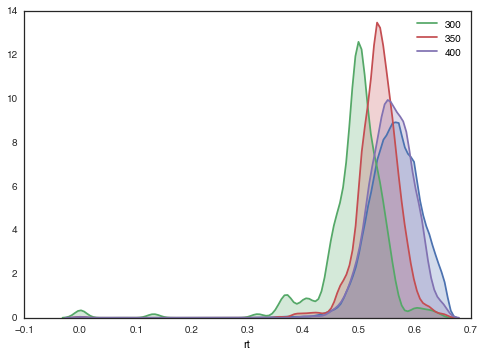

In [155]:
sns.distplot(cor.rt, hist=False, kde_kws={'shade':True})
for ssd, ssdf in errs.groupby('ssd'):
      sns.distplot(ssdf.rt, hist=False, kde_kws={'shade':True}, label=ssd)

In [85]:
x = mjci(errs.rt, prob=prob)
x[1]/x

array([  0.10616,   1.     ,  33.03191,   1.71993,  17.60865])

In [75]:
pd.DataFrame(qe_var).median(axis=0)/pd.DataFrame(qe_var)

,0,1,2,3,4
0,0.2484,0.9237,0.2324,1.0000,1.0000
1,1.0000,28.5217,1.0000,0.7895,0.8208
2,1.1232,1.0000,62.1994,1.0888,2.2177


In [69]:
 np.hstack(errs.groupby('ssd').rt.apply(mjci, prob)).reshape(nssd, nquant)

array([[  1.63478e-02,   6.54360e-03,   5.84673e-03,   4.82223e-03,
          3.92189e-03],
       [  4.06028e-03,   2.11915e-04,   1.35904e-03,   6.10767e-03,
          4.77798e-03],
       [  3.61481e-03,   6.04419e-03,   2.18498e-05,   4.42912e-03,
          1.76845e-03]])

In [32]:
qewts = np.median(qe_var,axis=1)[:,None]/qe_var
pd.DataFrame(qewts)

,0,1,2,3,4
0,0.7832,1.0540,1.0000,0.8307,1.2698
1,0.1376,1.0828,2.1600,1.0000,0.3280
2,0.3576,0.8935,1.0000,1.2125,1.4908
3,1.0000,19.1599,2.9876,0.6648,0.8498
4,1.0000,0.5981,165.4388,0.8161,2.0441


In [43]:
r = np.nanmean(mjci(mx.observed.iloc[:,7:], prob=prob, axis=1), axis=0)

/home/kyle/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


masked_array(data = [nan 0.1521425298365544 0.0208125617466742 0.017881232757761475
 0.014311521331348427],
             mask = [False False False False False],
       fill_value = 1e+20)

In [ ]:
mx.observed.iloc[:,6:]

In [33]:
xrt = np.round(err.rt,3)


In [53]:
len(df[(df.ttype=='stop')&(df.response==1)])

3463

In [60]:
errcount = err.groupby('ssd').count()['response']
errcount[errcount>40].index


Int64Index([300, 350, 400], dtype='int64', name=u'ssd')

In [48]:
df.query('ttype=="stop"&response==1').groupby('ssd').count()

,idx,GoTrial,StopSignal,Cond,ttype,choice,response,acc,rt
ssd,,,,,,,,,
200,15,15,15,15,15,15,15,15,15
250,39,39,39,39,39,39,39,39,39
300,217,217,217,217,217,217,217,217,217
350,1099,1099,1099,1099,1099,1099,1099,1099,1099
400,2093,2093,2093,2093,2093,2093,2093,2093,2093


In [46]:
err.groupby('')

array([  5.02376e-04,   2.99706e-03,           nan,   7.53636e-04,
         7.11913e-05])

In [ ]:
qc_var = mjci(cor.rt.values, prob, )

array([  0.37328,   0.42754,   1.0351 ,   7.41959,  57.41247])

In [24]:
np.median(mjci(err.rt, prob))/mjci(err.rt, prob)

array([  1.     ,   0.17432,  27.91884,   0.70715,  18.73337])

In [370]:
f = mx.fitinfo
p = mx.popt

In [371]:
ii=0
ys=[]
fs=[]
while not f['CNVRG'] and ii<=25:
      y,f,p = mx.opt.gradient_descent(y=mx.avg_y, wts=mx.avg_wts, is_flat=False, inits=p)
      ys.append(y)
      fs.append(f)
      ii+=1

KeyboardInterrupt: 

In [ ]:
ys

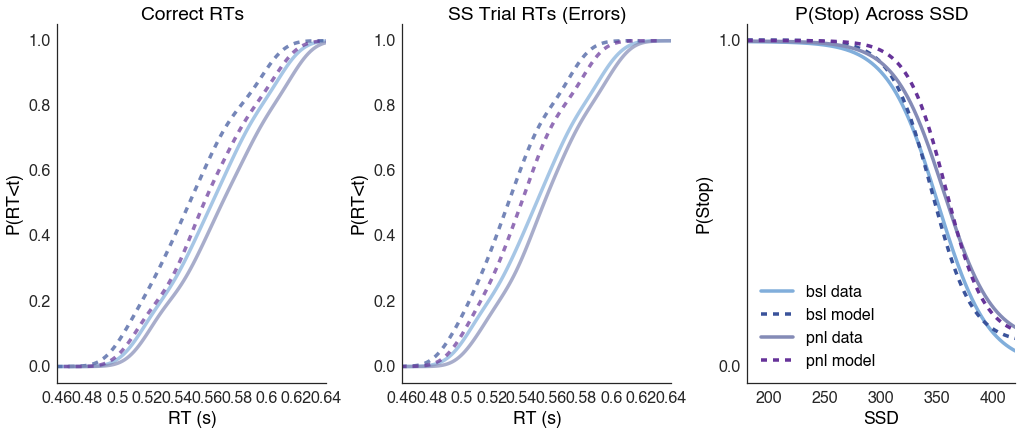

In [356]:
vis.plot_reactive_fits(mx)

In [ ]:
yhat, finfo, popt = m.opt.gradient_descent(y=bsly, wts=bslwts, inits=m.inits, is_flat=True)